<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** 
- Carlos Emiliano Rodríguez Núñez
- Manuel Alejandro Murguía Orantes

**Fecha:** 6 de Febrero del 2024.

**Expediente** : 
- 738288
- 739360
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: 
https://github.com/ElChicoYetix/Tarea2_Rodriguez_Murguia

# Tarea 2: Clase 5

> Descripción de la tarea
Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:
1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilud, justificando la estructura propuesta.
2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis realizados, incluyendo los resultados de las gráficas de ACF y PAC.
3. Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procediemiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:
```
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
```
**Nota**: Pueden basarse en el siguiente enlace para entender el análisis a realizar 
https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

4. Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resulados en una gráfica donde se puedan observar los datos reales y los datos predichos, cómo en la siguiente gráfica:
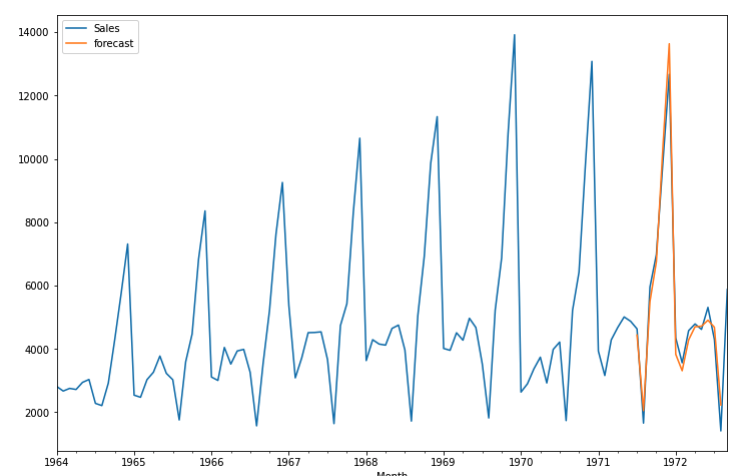

### Ejercicio 1: (enunciado) Transcribirlo

## Código de solución estudiante 1

1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilud, justificando la estructura propuesta.

In [ ]:
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from io import BytesIO
import pandas as pd

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", size=12)

In [ ]:
# Código de solución estudiante 1
data = pd.read_csv('WWWusage.csv', names=['values'], header=0)
data.index = data.index.droplevel()
data.head()
data.plot(figsize=(12,6));

In [ ]:
# Escoger parámetros de ARIMA
f = plt.figure(figsize=(12,3))

ax1 = f.add_subplot(121)

plot_acf(data, ax=ax1)

ax2 = f.add_subplot(122)
plot_pacf(data, ax=ax2, method='ols')

plt.show()

In [ ]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

adf_test(data)

diff1_values = data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

diff3_values = data.diff().diff().diff().dropna()

print('ADF para derivada tercer orden...\n')
adf_test(diff3_values)

diff4_values = data.diff().diff().diff().diff().dropna()

print('ADF para derivada cuarto orden...\n')
adf_test(diff4_values)

In [ ]:
# 1. Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(diff2_values, {'lags':40})

ARIMA(p=2, d=2, q=2)

In [ ]:
plot_acf_pacf(diff3_values, {'lags':40})

ARIMA(p=2, d=3, q=2)

In [ ]:
arima_model1 = ARIMA(data, order=(3, 1, 4))
model1 = arima_model1.fit()
print(model1.summary())

In [ ]:
# Términos de AR
ar = (0, 1)  # (alpha1, alpha2)
# Términos de MA
ma = (0, 1)  # (beta1, beta2)

arima_model2 = ARIMA(data, order=(ar, 2, ma))
model2 = arima_model2.fit()
print(model2.summary())

In [ ]:
# Términos de AR
ar = (0, 1)  # (alpha1, alpha2)
# Términos de MA
ma = (0, 1)  # (beta1, beta2)

arima_model3 = ARIMA(data, order=(ar, 3, ma))
model3 = arima_model3.fit()
print(model3.summary())

Observamos que la log-likelihood va disminuyendo mientras más se diferencia la serie de tiempo, por lo que utilizaremos el modelo 2.

In [ ]:
# Cómo realizar predicciones con el modelo ajustado
y_h = model2.predict(start=40, end=115, dynamic=False).to_frame()

ax = data.plot()

y_h.plot(ax=ax);

In [ ]:
# Cómo realizar predicciones con el modelo ajustado
y_h = model3.predict(start=40, end=115, dynamic=False).to_frame()

ax = data.plot()

y_h.plot(ax=ax);

El modelo a utilizar es el Modelo 2 debido a que no mejora al seguir diferenciando la base de datos.

In [ ]:
# Gráfico de los diagnósticos para los residuos
model2.plot_diagnostics()
plt.tight_layout();

2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis realizados, incluyendo los resultados de las gráficas de ACF y PAC.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador a la serie de tiempo
scaler.fit(data.values.reshape(-1, 1))

# Normalizar la serie de tiempo
serie_tiempo_normalizada = scaler.transform(data.values.reshape(-1, 1))

# Agregar la serie de tiempo normalizada al dataframe
data["Valor normalizado"] = serie_tiempo_normalizada

norm_data = data["Valor normalizado"]
norm_data

Normalizamos la serie de tiempo.

In [ ]:
norm_data.plot(figsize=(12,6));

In [ ]:
f = plt.figure(figsize=(12,3))

ax1 = f.add_subplot(121)

plot_acf(norm_data, ax=ax1)

ax2 = f.add_subplot(122)
plot_pacf(norm_data, ax=ax2, method='ols')

plt.show()

In [ ]:
adf_test(norm_data)

diff1_values = norm_data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = norm_data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

diff3_values = norm_data.diff().diff().diff().dropna()

print('ADF para derivada tercer orden...\n')
adf_test(diff3_values)

El modelo sí mejora pero se tiene que diferenciar 2 veces.

In [ ]:
plot_acf_pacf(diff2_values, {'lags':40})

ARIMA(p=2, d=2, q=2)

In [ ]:
plot_acf_pacf(diff3_values, {'lags':40})

ARIMA(p=2, d=3, q=2)

In [ ]:
# Términos de AR
ar = (0, 1)  # (alpha1, alpha2)
# Términos de MA
ma = (0, 1)  # (beta1, beta2)

arima_model2_norm = ARIMA(norm_data, order=(ar, 2, ma))
model2_norm = arima_model2_norm.fit()
print(model2_norm.summary())

In [ ]:
# Términos de AR
ar = (0, 1)  # (alpha1, alpha2)
# Términos de MA
ma = (0, 1)  # (beta1, beta2)

arima_model3 = ARIMA(norm_data, order=(ar, 3, ma))
model3 = arima_model3.fit()
print(model3.summary())

Me quedo con el modelo 2 porque la Log Likelihood es mayor que en el modelo 3, y si comparamos, a la hora de diferenciar nos arrojan mejores valores que sin diferenciarla.

3. Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procediemiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:
```
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
```
**Nota**: Pueden basarse en el siguiente enlace para entender el análisis a realizar 
https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import requests
from datetime import datetime

# Cargar el conjunto de datos
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')

data2

Se elige la columna air por conveniencia.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data2['air'], model="additive")
decompose_data.plot();

Ploteamos la seasonalidad.

In [ ]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green');

In [ ]:
adf_test(data2['air'])

diff1_values = data2['air'].diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = data2['air'].diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

In [ ]:
plot_acf_pacf(diff2_values, {'lags':40})

In [ ]:
# Términos de AR
ar = (0, 1)  # (alpha1, alpha2)
# Términos de MA
ma = (0, 1)  # (beta1, beta2)

arima_model3 = ARIMA(data2['air'], order=(ar, 2, ma))
model3 = arima_model3.fit()
print(model3.summary())

No funciona bien el método ARIMA, probamos con SARIMAX

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data2['air'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [ ]:
data2['forecast']=results.predict(start=90,end=103,dynamic=True)
data2[['air','forecast']].plot(figsize=(12,8))

4. Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resulados en una gráfica donde se puedan observar los datos reales y los datos predichos

Predicción del Modelo Arima de la base de datos del paso 1.

In [ ]:
# Cómo realizar predicciones con el modelo ajustado
y_h = model2_norm.predict(start=90, end=110, dynamic=False).to_frame()

ax = norm_data.plot()

y_h.plot(ax=ax);

Predicción del Data 2 columna 'Air' de la base de datos del ejercicio 3.

In [ ]:
data2['forecast'] = results.predict(start = 130, end = 170, dynamic= True)  
data2[['air', 'forecast']].plot(figsize=(12, 8));

## Código de solución estudiante 2

> **Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilud, justificando la estructura propuesta.**

In [1]:
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from io import BytesIO
import pandas as pd
import requests
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# plt.rc("figure", figsize=(11,8))
plt.rc("font", size=12)

<Axes: >

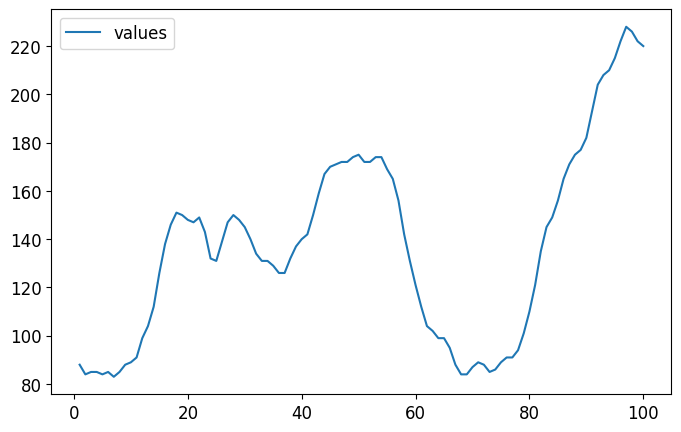

In [2]:
data = pd.read_csv('WWWusage.csv', names=[ 'values'], header=0)
data.index = data.index.droplevel()
data.plot(figsize=(8, 5))

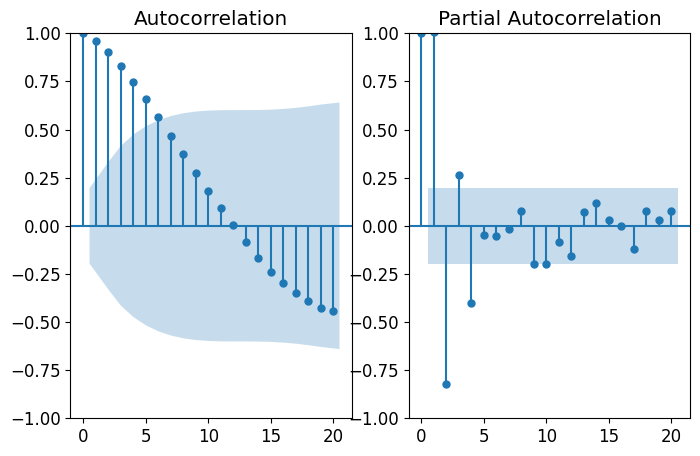

In [3]:
# Escoger parámetros de ARIMA

# 1. Graficar ACF y PACF
f = plt.figure(figsize=(8,5))

ax1 = f.add_subplot(121)

plot_acf(data, ax=ax1)

ax2 = f.add_subplot(122)
plot_pacf(data, ax=ax2, method='ols')

plt.show()

In [4]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [6]:
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


Dado que no es estacionario, procedemos a diferenciarlo hasta llegar a una estacionalidad 

In [8]:
diff1_values = data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

diff3_values = data.diff().diff().diff().dropna()

print('ADF para derivada tercer orden...\n')
adf_test(diff3_values)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Stationary
ADF para derivada tercer orden...

Results of Dickey-Fuller Test:
Test Statistic                -6.266020e+00
p-value                        4.112280e-08
#Lags Used                     1.000000e+01
Number of Observat

Dado que los valores de p-value cuando nuestra serie de tiempo se vuelve estacionaria son muy bajos, decidí quedarme con la derivada de primer orden dado que su p-value es el más próximo al valor deseado, es decir, un valor de 0.05

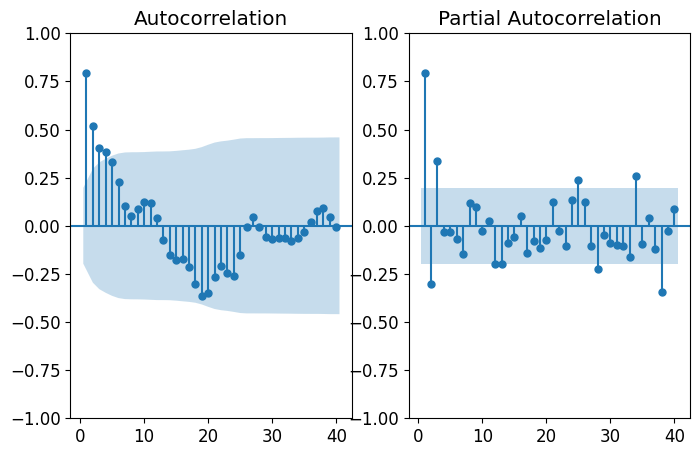

In [9]:
# 1. Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(diff1_values, {'lags':40})

Dadas las gráficas anteriores podemos establecer que es un modelo ARIMA(3, 1, 0)

In [10]:
# Spliteamos el dataset en train, test & validation
train_size = int(len(diff1_values) * 0.7)
val_size = int(len(diff1_values) * 0.15)
test_size = len(diff1_values) - train_size - val_size

train, test = train_test_split(diff1_values, test_size=test_size, shuffle=False)
train, val = train_test_split(train, test_size=val_size, shuffle=False)

In [11]:
# modelo ARIMA
arima = ARIMA(train, order=(3, 1, 0))
model1 = arima.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   69
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -179.801
Date:                Tue, 06 Feb 2024   AIC                            367.602
Time:                        14:48:45   BIC                            376.480
Sample:                             0   HQIC                           371.119
                                 - 69                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2029      0.130      1.556      0.120      -0.053       0.459
ar.L2         -0.3558      0.108     -3.306      0.001      -0.567      -0.145
ar.L3         -0.0284      0.136     -0.209      0.8

<Axes: >

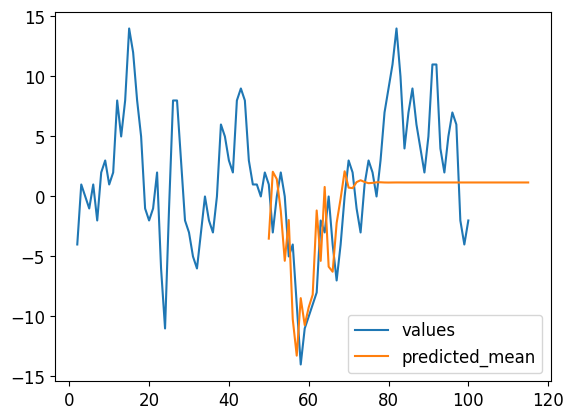

In [12]:
y_h = model1.predict(start=50, end=115).to_frame()
ax = diff1_values.plot()
y_h.plot(ax=ax)

> **Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis realizados, incluyendo los resultados de las gráficas de ACF y PAC.**

In [13]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data))

In [14]:
adf_test(scaled_data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


Dado que nuestra serie de tiempo no es estacionaria ni el p-value es cercano a 0.05, diferenciaré hasta que se cumplan una de las dos condiciones

In [15]:
diff1_scaled = scaled_data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_scaled)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


Dada la primera diferenciación nos sirve

In [16]:
# Spliteamos el dataset en train, test & validation
train_size = int(len(diff1_scaled) * 0.7)
val_size = int(len(diff1_scaled) * 0.15)
test_size = len(diff1_scaled) - train_size - val_size

train_esc, test_esc = train_test_split(diff1_scaled, test_size=test_size, shuffle=False)
train_esc, val_esc = train_test_split(train_esc, test_size=val_size, shuffle=False)

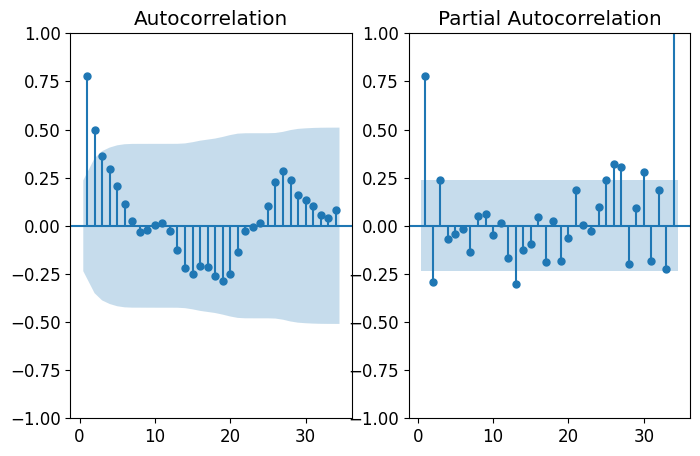

In [17]:
# Vemos las funciones de ACF y PACF
plot_acf_pacf(train_esc, {'lags':34})

Quise tomar en cuenta todos los posibles valores 

In [18]:
# modelo ARIMA
arima1 = ARIMA(train_esc, order=(2, 1, 2))
model1 = arima1.fit()
print(model1.summary())

# modelo ARIMA
arima2 = ARIMA(train_esc, order=(3, 1, 2))
model2 = arima2.fit()
print(model2.summary())

# modelo ARIMA
arima3 = ARIMA(train_esc, order=(2, 1, 0))
model3 = arima3.fit()
print(model3.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   69
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 160.166
Date:                Tue, 06 Feb 2024   AIC                           -310.332
Time:                        14:49:04   BIC                           -299.235
Sample:                             0   HQIC                          -305.935
                                 - 69                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6110      0.305      2.006      0.045       0.014       1.208
ar.L2          0.0288      0.288      0.100      0.920      -0.535       0.593
ma.L1         -0.5002      0.295     -1.697      0.0

Según los resultados del Log, AIC & BIC, decidí tomar el tercer modelo

<Axes: >

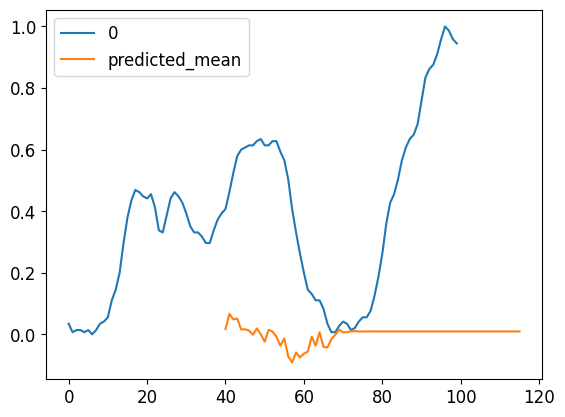

In [19]:
y_h = model3.predict(start=40, end=115).to_frame()
ax = scaled_data.plot()
y_h.plot(ax=ax)

Bueno, no funcionó

> **Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procedimiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:**
1. air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
2. data2 = pd.read_stata(BytesIO(air2))
3. data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')

In [20]:
# Download the data
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))

data2['time'] = data2['time'].astype(int)
data2.index = pd.date_range(start=datetime(data2['time'][0], 1, 1), periods=len(data2), freq='MS')
data2.head(5)

,air,time,t
1949-01-01,112,1949,1.0
1949-02-01,118,1949,2.0
1949-03-01,132,1949,3.0
1949-04-01,129,1949,4.0
1949-05-01,121,1949,5.0


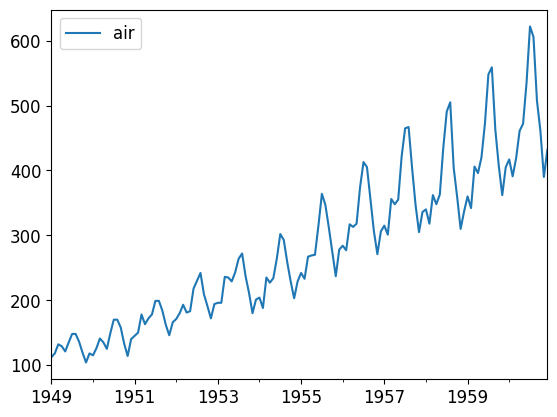

In [21]:
data2 = data2[["air"]]
data2.plot()
plt.show()

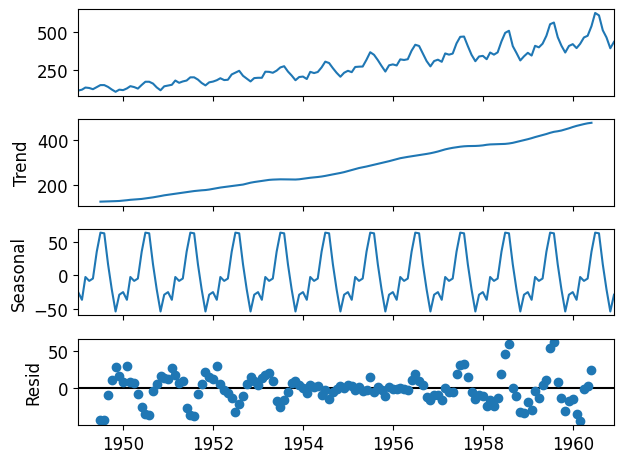

In [22]:
decompose_data = seasonal_decompose(data2, model="additive")
decompose_data.plot();

In [23]:
adf_test(data2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Non-stationary


In [24]:
diff2_values = data2.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff2_values)

diff3_values = data2.diff().diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff3_values)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Non-stationary
ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64
Stationary


primer orden

In [25]:
# Spliteamos el dataset en train, test & validation
train_size = int(len(data2) * 0.7)
val_size = int(len(data2) * 0.15)
test_size = len(data2) - train_size - val_size

train_2, test_2 = train_test_split(data2, test_size=test_size, shuffle=False)
train_2, val_2 = train_test_split(train_2, test_size=val_size, shuffle=False)

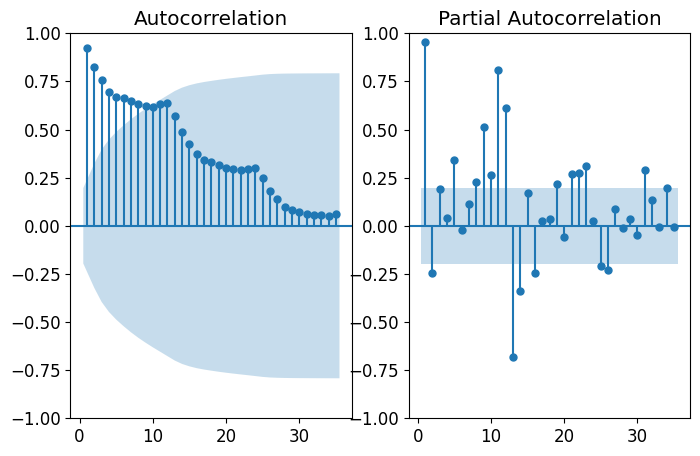

In [26]:
plot_acf_pacf(train_2, {'lags':35})

In [27]:
modelo = SARIMAX(endog = train_2, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
modelo_res = modelo.fit(disp=0)
print(modelo_res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                air   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -318.808
Date:                            Tue, 06 Feb 2024   AIC                            647.617
Time:                                    14:50:21   BIC                            659.947
Sample:                                01-01-1949   HQIC                           652.582
                                     - 04-01-1957                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6025      0.338     -1.780      0.075      -1.266       0.061
ma.L1          0.3854      0.375   

In [28]:
predicciones_statsmodels = modelo_res.get_forecast(steps=test_size).predicted_mean
predicciones_statsmodels.name = 'predicciones_statsmodels'
display(predicciones_statsmodels.head(4))

1957-05-01    354.864959
1957-06-01    407.131041
1957-07-01    449.359185
1957-08-01    438.788742
Freq: MS, Name: predicciones_statsmodels, dtype: float64

<Axes: >

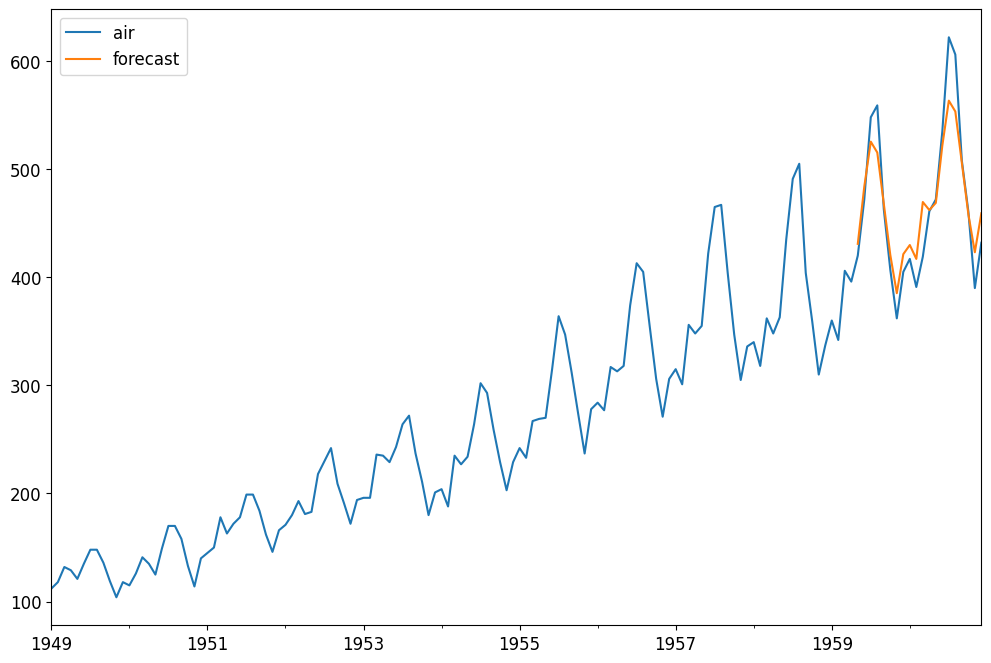

In [29]:
data2['forecast']=modelo_res.predict(start=124,end=144,dynamic=True)
data2[['air','forecast']].plot(figsize=(12,8))

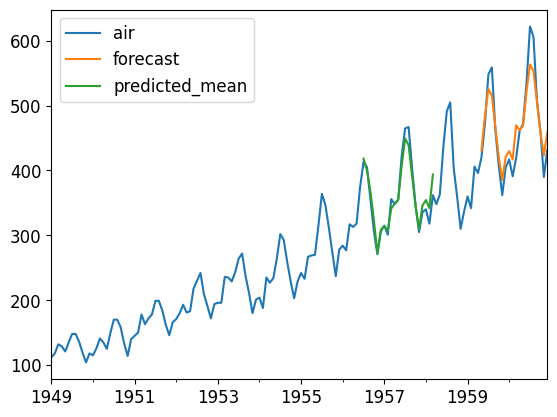

In [31]:
# Cómo realizar predicciones con el modelo ajustado
y_h = modelo_res.predict(start=90, end=110, dynamic=False).to_frame()

ax = data2.plot()

y_h.plot(ax=ax);

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........